In [42]:
# %matplotlib notebook

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [44]:
filename='C:\\Users\\Admin\\Desktop\\Data\\A304_MR\\MR_304_100.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value'])
df['multiplier'] = 10**6
df
(df['V5'],df['V6']) = (df['V6'], df['V5'])
(df['V7'],df['V8']) = (df['V8'], df['V7'])

# NEED TO ADD MULITPLIER IN THE LABVIEW CODE

In [45]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[["I", "B","B_int","T", "V1", "V2", "V3", "V4","V5","V6","V7","V8",'Rel_value', 'multiplier']].copy()
df.head()

,I,B,B_int,T,V1,V2,V3,V4,V5,V6,V7,V8,Rel_value,multiplier
0,0.001,10000.484326,10000,99.999311,4262.132438,-4262.016500,3762.818611,-3762.685112,4259.852832,-4259.863616,3764.675052,-3764.601133,-0.000002,1000000
1,0.001,9000.507568,9000,99.999940,4262.851705,-4262.753659,3764.550160,-3764.437428,4260.659515,-4260.652015,3766.491123,-3766.293604,-0.000002,1000000
2,0.001,8000.326758,8000,100.000605,4263.591875,-4263.506483,3766.361491,-3766.301586,4261.409023,-4261.464522,3768.298505,-3768.094834,-0.000002,1000000
3,0.001,7000.421851,7000,100.000011,4264.363364,-4264.316762,3768.133106,-3768.073742,4262.228600,-4262.255026,3770.084555,-3769.970770,-0.000002,1000000
4,0.001,6000.410962,6000,100.000005,4265.114339,-4265.001374,3769.885646,-3769.842867,4262.961278,-4263.000626,3771.892541,-3771.752533,-0.000002,1000000


In [46]:

df['R1'] = df['V1']/(df['multiplier']*df['I'])
df['R2'] = df['V2']/(df['multiplier']*df['I'])
df['R3'] = df['V3']/(df['multiplier']*df['I'])
df['R4'] = df['V4']/(df['multiplier']*df['I'])
df['R5'] = df['V5']/(df['multiplier']*df['I'])
df['R6'] = df['V6']/(df['multiplier']*df['I'])
df['R7'] = df['V7']/(df['multiplier']*df['I'])
df['R8'] = df['V8']/(df['multiplier']*df['I'])

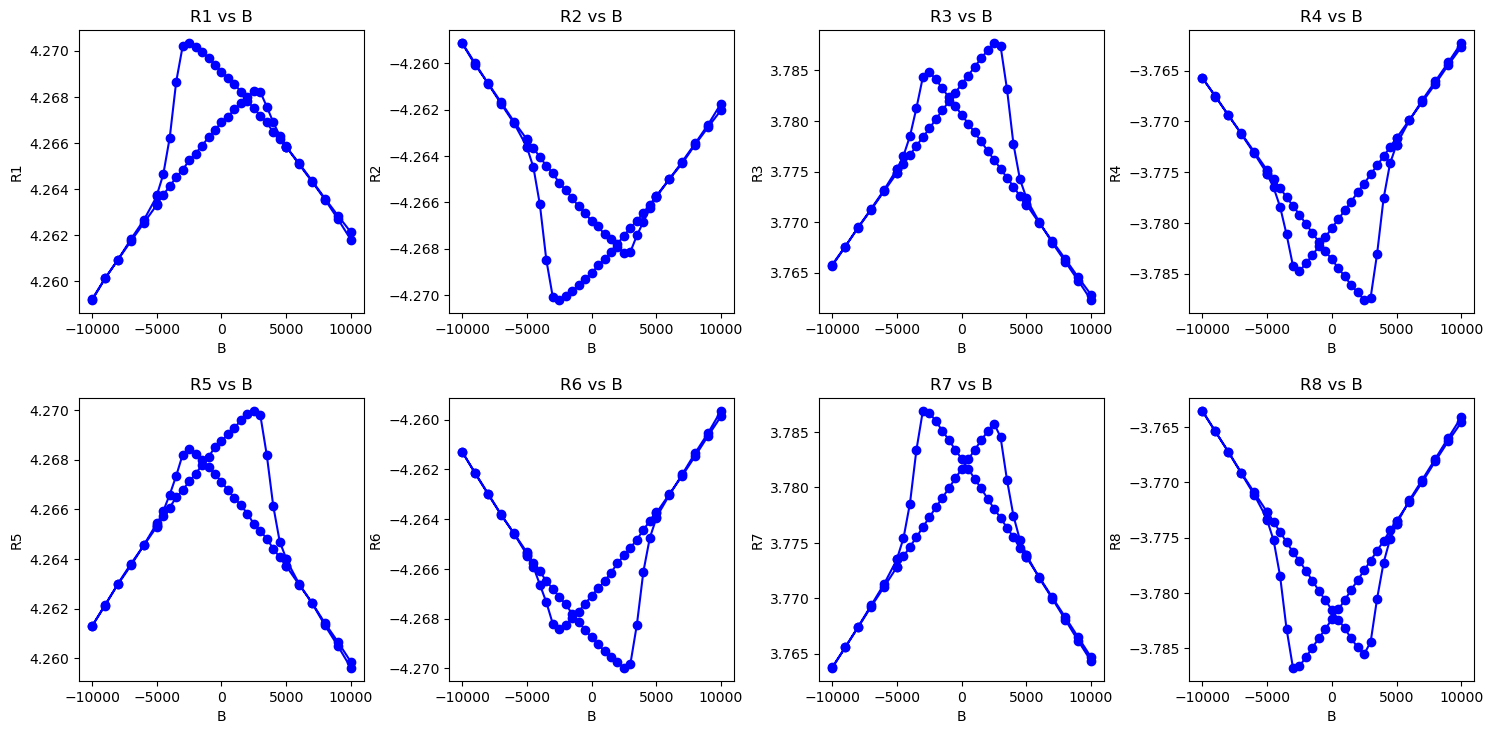

In [47]:
plt.figure(figsize=(18,18))
plt.subplot(4,4,1)
plt.plot(df['B'],df['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')

plt.subplot(4,4,2)
plt.plot(df['B'],df['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')

plt.subplot(4,4,3)
plt.plot(df['B'],df['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(4,4,4)
plt.plot(df['B'],df['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplot(4,4,5)
plt.plot(df['B'],df['R5'], 'bo-')
plt.title('R5 vs B')
plt.ylabel('R5')
plt.xlabel('B')
plt.subplot(4,4,6)
plt.plot(df['B'],df['R6'], 'bo-')
plt.title('R6 vs B')
plt.ylabel('R6')
plt.xlabel('B')
plt.subplot(4,4,7)
plt.plot(df['B'],df['R7'], 'bo-')
plt.title('R7 vs B')
plt.ylabel('R7')
plt.xlabel('B')
plt.subplot(4,4,8)
plt.plot(df['B'],df['R8'], 'bo-')
plt.title('R8 vs B')
plt.ylabel('R8')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

In [48]:
df['Ra'] = (df['R1'] + df['R5'] - df['R2'] - df['R6'])/4
df['Rb'] = (df['R3'] + df['R7'] - df['R4'] - df['R8'])/4
df['R'] = (df['Ra'] + df['Rb'])/2

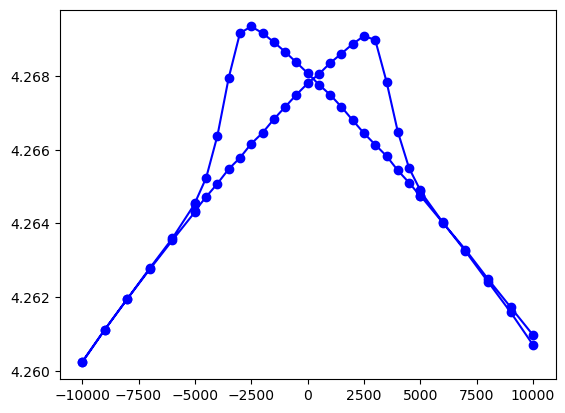

In [49]:
plt.plot(df['B_int'], df['Ra'],'bo-')

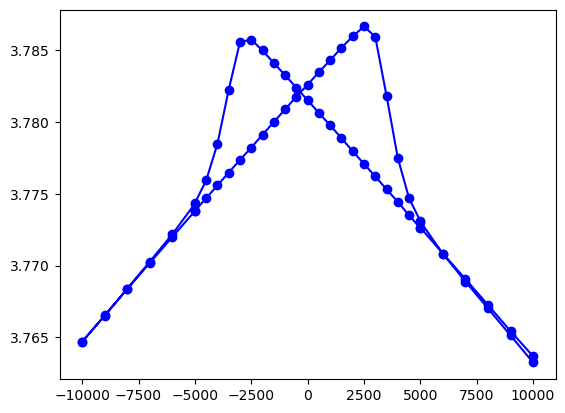

In [50]:
plt.plot(df['B_int'], df['Rb'],'bo-')
plt.show()

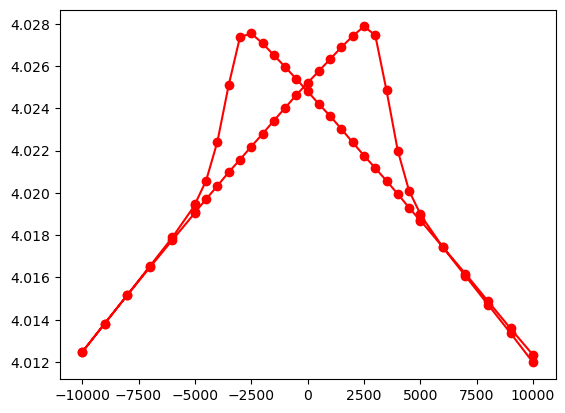

In [51]:
plt.plot(df['B_int'], df['R'], 'ro-')
plt.show()

In [52]:
# df.iloc
# df.loc
R0 = df.loc[df['B_int'] == 0]['R'].mean()
R0

4.02499928716075

In [53]:
df['MR'] = (df['R'] - R0)/R0*100

In [54]:
df[['B_int','MR']].head()

,B_int,MR
0,10000,-0.314749
1,9000,-0.283556
2,8000,-0.251447
3,7000,-0.219156
4,6000,-0.188022


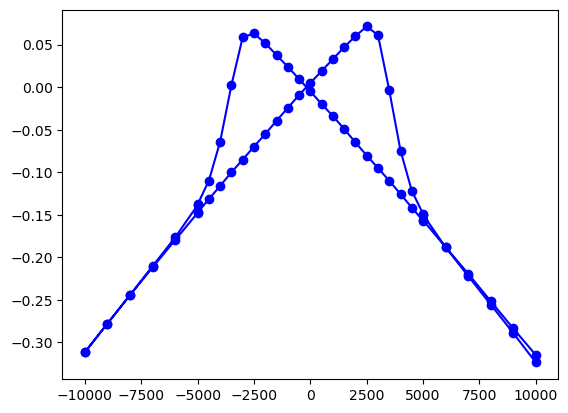

In [55]:
plt.plot(df['B_int'], df['MR'], 'bo-')

In [56]:
df.to_pickle('./pickle_data/MR_100K.pkl')

In [57]:
df['B'] = df['B_int']
df

,I,B,B_int,T,V1,V2,V3,V4,V5,V6,...,R3,R4,R5,R6,R7,R8,Ra,Rb,R,MR
0,0.001,10000,10000,99.999311,4262.132438,-4262.016500,3762.818611,-3762.685112,4259.852832,-4259.863616,...,3.762819,-3.762685,4.259853,-4.259864,3.764675,-3.764601,4.260966,3.763695,4.012331,-0.314749
1,0.001,9000,9000,99.999940,4262.851705,-4262.753659,3764.550160,-3764.437428,4260.659515,-4260.652015,...,3.764550,-3.764437,4.260660,-4.260652,3.766491,-3.766294,4.261729,3.765443,4.013586,-0.283556
2,0.001,8000,8000,100.000605,4263.591875,-4263.506483,3766.361491,-3766.301586,4261.409023,-4261.464522,...,3.766361,-3.766302,4.261409,-4.261465,3.768299,-3.768095,4.262493,3.767264,4.014879,-0.251447
3,0.001,7000,7000,100.000011,4264.363364,-4264.316762,3768.133106,-3768.073742,4262.228600,-4262.255026,...,3.768133,-3.768074,4.262229,-4.262255,3.770085,-3.769971,4.263291,3.769066,4.016178,-0.219156
4,0.001,6000,6000,100.000005,4265.114339,-4265.001374,3769.885646,-3769.842867,4262.961278,-4263.000626,...,3.769886,-3.769843,4.262961,-4.263001,3.771893,-3.771753,4.264019,3.770843,4.017431,-0.188022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.001,6000,6000,100.000361,4265.075079,-4265.004855,3769.994916,-3769.890643,4262.993832,-4263.036205,...,3.769995,-3.769891,4.262994,-4.263036,3.771819,-3.771611,4.264027,3.770829,4.017428,-0.188101
62,0.001,7000,7000,100.000484,4264.323576,-4264.243399,3767.959284,-3767.883416,4262.219711,-4262.201815,...,3.767959,-3.767883,4.262220,-4.262202,3.769972,-3.769760,4.263247,3.768894,4.016070,-0.221837
63,0.001,8000,8000,100.000016,4263.546845,-4263.457989,3766.093706,-3766.037824,4261.321767,-4261.342102,...,3.766094,-3.766038,4.261322,-4.261342,3.768072,-3.767883,4.262417,3.767022,4.014719,-0.255400
64,0.001,9000,9000,100.000645,4262.702672,-4262.643472,3764.222360,-3764.192930,4260.492190,-4260.536580,...,3.764222,-3.764193,4.260492,-4.260537,3.766166,-3.765992,4.261594,3.765143,4.013369,-0.288962


In [58]:
df['V1'] = (df['V1'] - df['V2'])/2
df['V2'] = (df['V3'] - df['V4'])/2
df['V3'] = (df['V5'] - df['V6'])/2
df['V4'] = (df['V7'] - df['V8'])/2

In [59]:
df = df[['I','B','V1','V2','V3','V4',"multiplier"]].copy()
df

,I,B,V1,V2,V3,V4,multiplier
0,0.001,10000,4262.074469,3762.751862,4259.858224,3764.638092,1000000
1,0.001,9000,4262.802682,3764.493794,4260.655765,3766.392364,1000000
2,0.001,8000,4263.549179,3766.331538,4261.436773,3768.196670,1000000
3,0.001,7000,4264.340063,3768.103424,4262.241813,3770.027663,1000000
4,0.001,6000,4265.057856,3769.864256,4262.980952,3771.822537,1000000
...,...,...,...,...,...,...,...
61,0.001,6000,4265.039967,3769.942779,4263.015019,3771.715112,1000000
62,0.001,7000,4264.283487,3767.921350,4262.210763,3769.865870,1000000
63,0.001,8000,4263.502417,3766.065765,4261.331934,3767.977584,1000000
64,0.001,9000,4262.673072,3764.207645,4260.514385,3766.079165,1000000


In [60]:
min_B = df['B'].min()
max_B = df['B'].max()
print(min_B, max_B)

-10000 10000


In [61]:
B_min_idx = 0
for i in range(len(df)):
    if(df['B'].iloc[i]== min_B): 
        B_min_idx = i
        break

### Creating dec dataset

In [62]:
df_dec = df.iloc[ : B_min_idx+1].copy()
df_inc = df.iloc[B_min_idx+1 : ].copy()

data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1)

data_dec = data_dec[data_dec['B_x'] == -1*data_dec['B_y']] # selecting 

data_dec = data_dec[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [63]:
data_dec['V15'] = (data_dec['V1'] + data_dec['V5'])/2
data_dec['V26'] = (data_dec['V2'] + data_dec['V6'])/2
data_dec['V37'] = (data_dec['V3'] + data_dec['V7'])/2
data_dec['V48'] = (data_dec['V4'] + data_dec['V8'])/2

In [64]:
data_dec['Ra'] = (data_dec['V15'] + data_dec['V37'])/(2*data_dec['I']*data_dec['multiplier'])
data_dec['Rb'] = (data_dec['V26'] + data_dec['V48'])/(2*data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['Ra'] + data_dec['Rb'])/2

### Creating Increasing Dataset

In [65]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1)

data_inc = data_inc[data_inc['B_x'] == -1*data_inc['B_y']] # selecting 

data_inc = data_inc[['I_x','B_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_x' : 'B', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)

In [66]:
data_inc['V15'] = (data_inc['V1'] + data_inc['V5'])/2
data_inc['V26'] = (data_inc['V2'] + data_inc['V6'])/2
data_inc['V37'] = (data_inc['V3'] + data_inc['V7'])/2
data_inc['V48'] = (data_inc['V4'] + data_inc['V8'])/2

In [67]:
data_inc['Ra'] = (data_inc['V15'] + data_inc['V37'])/(2*data_inc['I']*data_inc['multiplier'])
data_inc['Rb'] = (data_inc['V26'] + data_inc['V48'])/(2*data_inc['I']*data_inc['multiplier'])
data_inc['R'] = (data_inc['Ra'] + data_inc['Rb'])/2

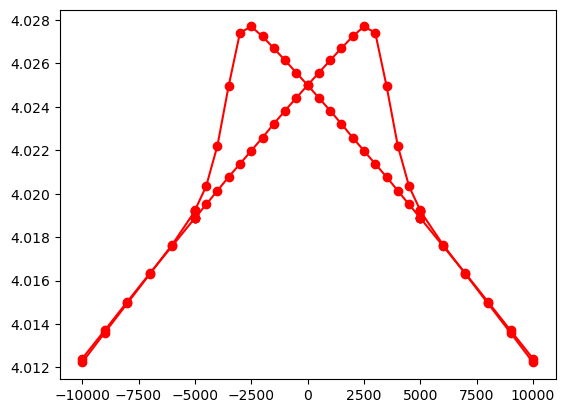

In [68]:

plt.plot(data_dec['B'],data_dec['R'], 'ro-')
plt.plot(data_inc['B'],data_inc['R'], 'ro-')